# ARIMAX recovering

## Подключение библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta
from google.colab import drive
from sklearn.metrics import mean_squared_error


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Подключение набора данных

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Prediction models/temp+co2.xlsx') 
df.drop(columns=['Unnamed: 0'],inplace=True)
df.index = df['date']
df.drop(columns=['date'],inplace=True)
df.sort_index(inplace=True)

In [ ]:
# Загрузка набора данных временных рядов (предположим, что это CSV-файл)
data = pd.read_excel('/content/drive/MyDrive/Prediction models/temp+co2.xlsx', 
                     index_col=0, parse_dates=True)
data = data[['date','T_30m','S1CO2','S2CO2']]
data = data[data['date'] <= datetime.strptime("2015-06-30", "%Y-%m-%d") + timedelta(days=60)]

In [ ]:
data.columns

Index(['date', 'T_30m', 'S1CO2', 'S2CO2'], dtype='object')

In [ ]:
data.to_excel('/content/drive/MyDrive/Prediction models/Исходный набор данных все ряды.xlsx')

# S2CO2

## ARIMAX (3,0,2) S2CO2 + T_30m, S1CO2 

In [ ]:
%%time
# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMAX
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 0
q = 2
P = 0
D = 0
Q = 0
s = 0

# Добавление экзогенных переменных (предполагается, что они находятся в столбцах 'exog1', 'exog2', ...)
exog_train = train[['T_30m', 'S1CO2']]
exog_test = test[['T_30m', 'S1CO2']]

# Построение модели ARIMAX
model = SARIMAX(train['S2CO2'], exog=exog_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=False)

# Прогнозирование
forecast = results.get_forecast(steps=60, exog=exog_test)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

CPU times: user 1.15 s, sys: 867 ms, total: 2.01 s
Wall time: 1.08 s


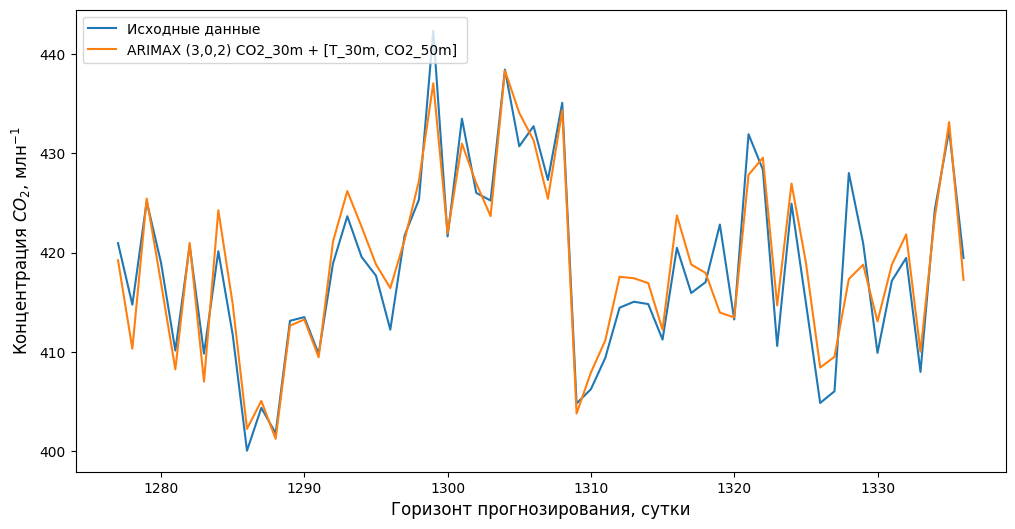

CPU times: user 373 ms, sys: 54.6 ms, total: 427 ms
Wall time: 451 ms


In [ ]:
%%time

# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['S2CO2'], label='Исходные данные')
plt.plot(test.index, forecast_values, label='ARIMAX (3,0,2) CO2_30m + [T_30m, CO2_50m] ')
#plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Горизонт прогнозирования, сутки',fontsize=12)
plt.ylabel('Концентрация $CO_{2}$, млн$^{-1}$', fontsize=12)
plt.show()

In [ ]:
%%time

model1 = forecast_values.reset_index()['predicted_mean']

CPU times: user 1.68 ms, sys: 0 ns, total: 1.68 ms
Wall time: 1.72 ms


In [ ]:
model1

0     419.385575
1     411.828003
2     424.656712
3     417.090626
4     409.671694
5     421.128644
6     409.165610
7     423.978149
8     416.270138
9     404.941293
10    407.081058
11    404.474828
12    414.227168
13    414.412660
14    411.266796
15    421.318872
16    425.584156
17    422.658317
18    420.012979
19    416.906903
20    421.433728
21    426.033940
22    434.349267
23    421.107536
24    429.387393
25    426.404059
26    423.117982
27    436.201957
28    432.435006
29    430.346753
30    424.733064
31    432.322636
32    405.986863
33    409.763073
34    412.930867
35    417.895222
36    417.482285
37    417.257859
38    413.583284
39    423.432011
40    419.100795
41    418.231820
42    414.261763
43    413.732292
44    426.678885
45    427.795353
46    415.245421
47    426.061456
48    418.622087
49    409.528197
50    410.628717
51    417.525284
52    418.696621
53    413.931718
54    419.131808
55    422.104931
56    411.433268
57    422.817834
58    431.3693

## ARIMAX (3,0,2) S2CO2 + T_30m

In [ ]:
%%time

# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMAX
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 1
q = 2
P = 2
D = 1
Q = 0
s = 6

# Добавление экзогенных переменных (предполагается, что они находятся в столбцах 'exog1', 'exog2', ...)
exog_train = train[['T_30m']]
exog_test = test[['T_30m']]

# Построение модели ARIMAX
model = SARIMAX(train['S2CO2'], exog=exog_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=False)

# Прогнозирование
forecast = results.get_forecast(steps=60, exog=exog_test)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


CPU times: user 13.3 s, sys: 9.93 s, total: 23.2 s
Wall time: 14.5 s


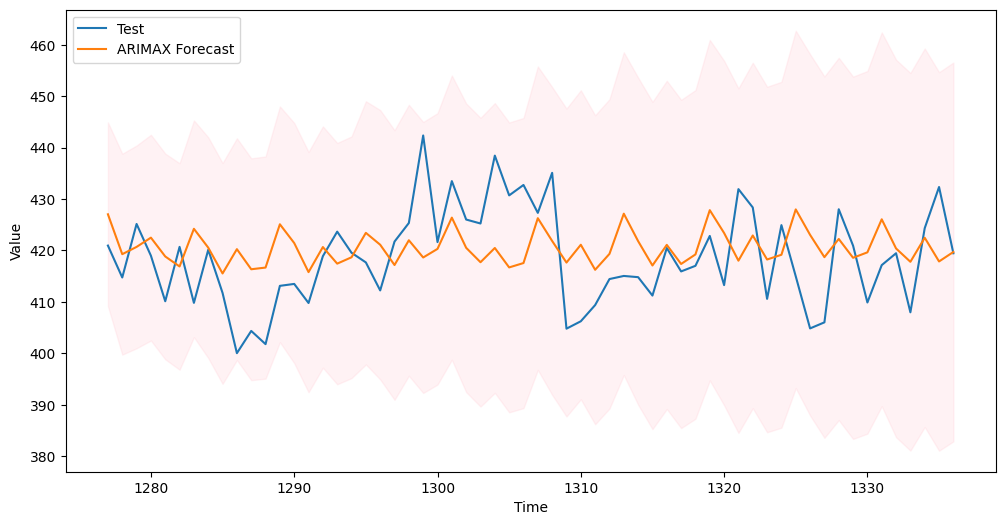

CPU times: user 312 ms, sys: 108 ms, total: 420 ms
Wall time: 305 ms


In [ ]:
%%time
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['S2CO2'], label='Test')
plt.plot(test.index, forecast_values, label='ARIMAX Forecast')
plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
%%time
model2 = forecast_values.reset_index()['predicted_mean']

CPU times: user 1.37 ms, sys: 230 µs, total: 1.6 ms
Wall time: 1.61 ms


## ARIMAX (3,0,2) S2CO2 + S1CO2

In [ ]:
%%time
# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMAX
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 0
q = 2
P = 0
D = 0
Q = 0
s = 0

# Добавление экзогенных переменных (предполагается, что они находятся в столбцах 'exog1', 'exog2', ...)
exog_train = train[['S1CO2']]
exog_test = test[['S1CO2']]

# Построение модели ARIMAX
model = SARIMAX(train['S2CO2'], exog=exog_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=False)

# Прогнозирование
forecast = results.get_forecast(steps=60, exog=exog_test)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

CPU times: user 1.23 s, sys: 841 ms, total: 2.07 s
Wall time: 2.04 s


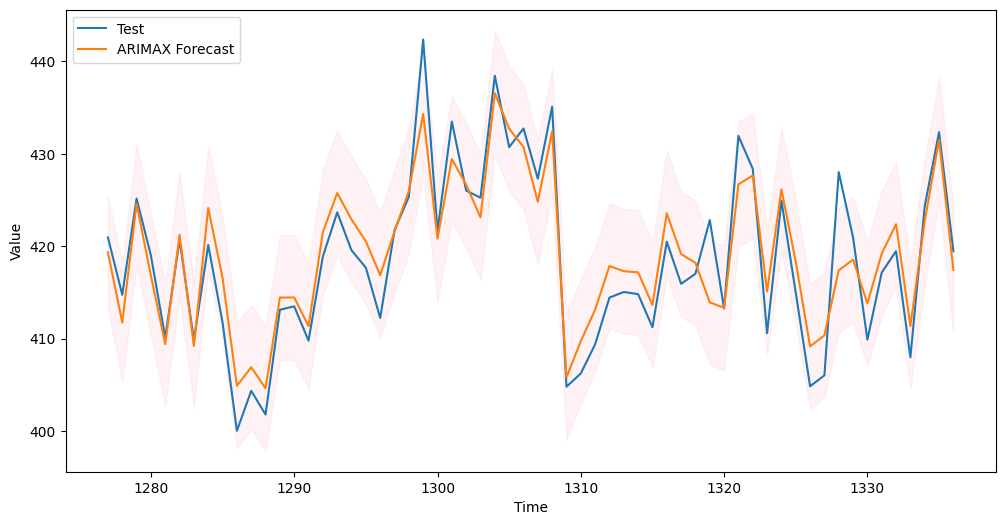

CPU times: user 383 ms, sys: 77.6 ms, total: 461 ms
Wall time: 491 ms


In [ ]:
%%time
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['S2CO2'], label='Test')
plt.plot(test.index, forecast_values, label='ARIMAX Forecast')
plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
%%time
test_data = test['S2CO2'].reset_index()['S2CO2']
model3 = forecast_values.reset_index()['predicted_mean']

CPU times: user 3.08 ms, sys: 0 ns, total: 3.08 ms
Wall time: 6.05 ms


In [ ]:
%%time
g = []
mse1 = []
mse2 = []
mse3 = []
for i in range(len(test_data)):
  g.append(i+1)
  mse1.append(mean_squared_error(test_data[:(i+1)],model1[:(i+1)]))
  mse2.append(mean_squared_error(test_data[:(i+1)],model2[:(i+1)]))
  mse3.append(mean_squared_error(test_data[:(i+1)],model3[:(i+1)]))


CPU times: user 87 ms, sys: 74 µs, total: 87 ms
Wall time: 90.9 ms


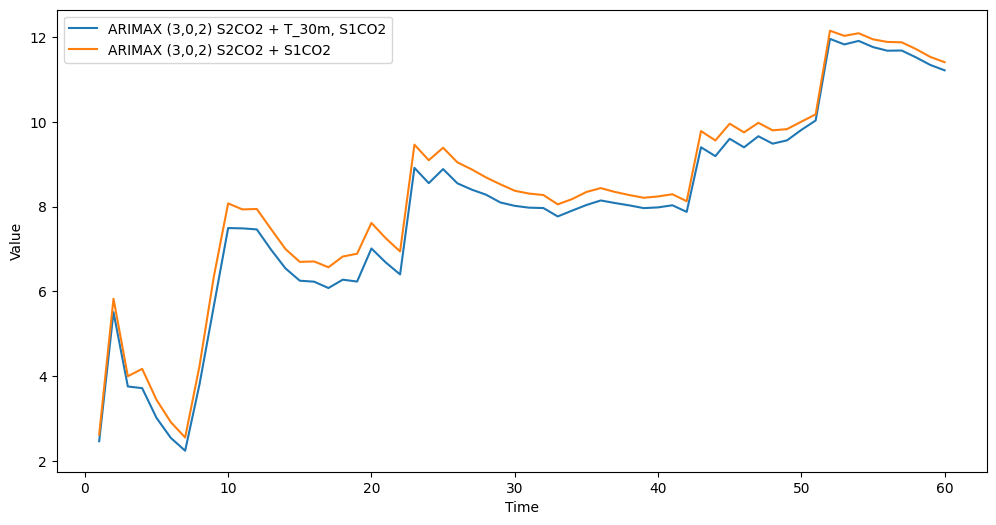

CPU times: user 280 ms, sys: 88.5 ms, total: 368 ms
Wall time: 296 ms


In [ ]:
%%time
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(g, mse1, label='ARIMAX (3,0,2) S2CO2 + T_30m, S1CO2')
#plt.plot(g, mse2, label='ARIMAX (3,0,2) S2CO2 + T_30m')
plt.plot(g, mse3, label='ARIMAX (3,0,2) S2CO2 + S1CO2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

ARIMA

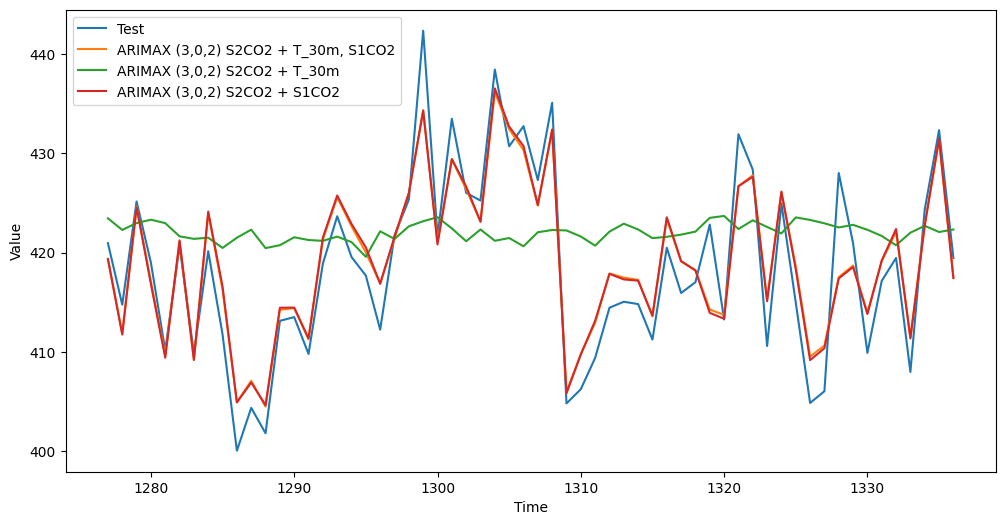

CPU times: user 299 ms, sys: 109 ms, total: 408 ms
Wall time: 314 ms


In [ ]:
%%time
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['S2CO2'], label='Test')
plt.plot(test.index, model1, label='ARIMAX (3,0,2) S2CO2 + T_30m, S1CO2')
plt.plot(test.index, model2, label='ARIMAX (3,0,2) S2CO2 + T_30m')
plt.plot(test.index, model3, label='ARIMAX (3,0,2) S2CO2 + S1CO2')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## ARIMA (3,0,2) 

In [ ]:
%%time
from statsmodels.tsa.arima.model import ARIMA

CPU times: user 13.5 ms, sys: 1.05 ms, total: 14.6 ms
Wall time: 28.4 ms


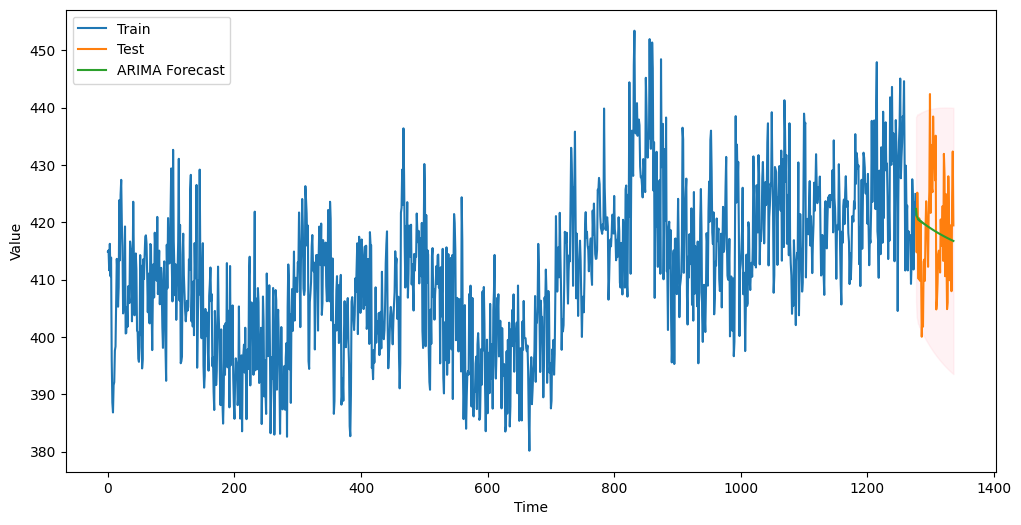

CPU times: user 2.85 s, sys: 1.78 s, total: 4.63 s
Wall time: 4.24 s


In [ ]:
%%time
# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMA
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 0
q = 2

# Построение модели ARIMA
model = ARIMA(train['S2CO2'], order=(p, d, q))
results = model.fit()

# Прогнозирование
forecast = results.get_forecast(steps=60)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['S2CO2'], label='Test')
plt.plot(test.index, forecast_values, label='ARIMA Forecast')
plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [ ]:
%%time
model4 = forecast_values.reset_index()['predicted_mean']

CPU times: user 1.81 ms, sys: 0 ns, total: 1.81 ms
Wall time: 2.26 ms


In [ ]:
%%time
g = []
mse1 = []
mse2 = []
mse3 = []
mse4 = []

for i in range(len(test_data)):
  g.append(i+1)
  mse1.append(mean_squared_error(test_data[:(i+1)],model1[:(i+1)]))
  mse2.append(mean_squared_error(test_data[:(i+1)],model2[:(i+1)]))
  mse3.append(mean_squared_error(test_data[:(i+1)],model3[:(i+1)]))
  mse4.append(mean_squared_error(test_data[:(i+1)],model4[:(i+1)]))

mse_table = pd.DataFrame({
    'g': g,
    'mse1': mse1,
    'mse2': mse2,
    'mse3': mse3,
    'mse4': mse4
})

data_table = pd.DataFrame({
    'time': g,
    'real data': test_data[:(i+1)],
    'ARIMAX (3,0,2) S2CO2 + T_30m, S1CO2': model1[:(i+1)],
    'ARIMAX (3,0,2) S2CO2 + T_30m': model2[:(i+1)],
    'ARIMAX (3,0,2) S2CO2 + S1CO2': model3[:(i+1)],
    'ARIMA (3,0,2) S2CO2': model4[:(i+1)]
})

mse_table.to_excel(f'/content/drive/MyDrive/Prediction models/new ARIMAX/mse errors all.xlsx')

data_table.to_excel(f'/content/drive/MyDrive/Prediction models/new ARIMAX/real data all.xlsx')

CPU times: user 242 ms, sys: 1.61 ms, total: 243 ms
Wall time: 2.39 s


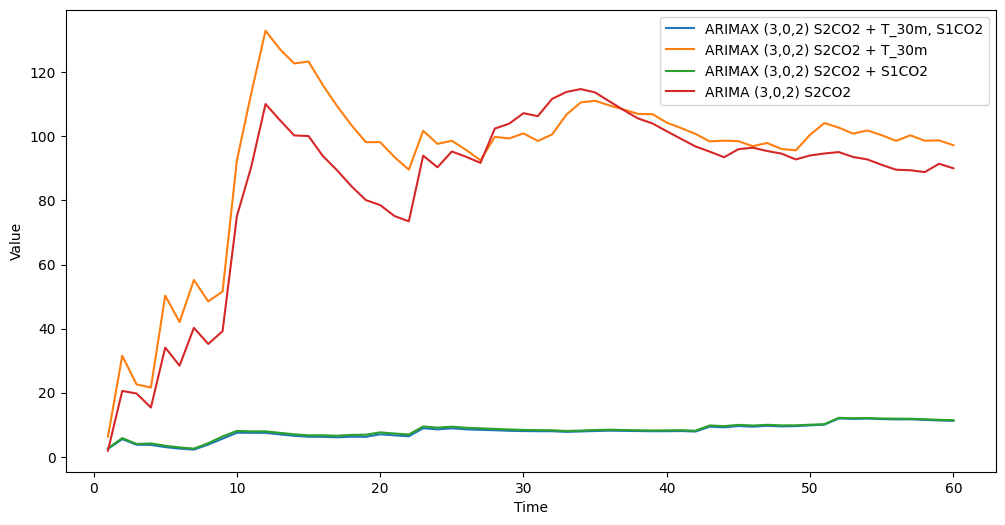

CPU times: user 301 ms, sys: 99.9 ms, total: 401 ms
Wall time: 316 ms


In [ ]:
%%time
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(g, mse1, label='ARIMAX (3,0,2) S2CO2 + T_30m, S1CO2')
plt.plot(g, mse2, label='ARIMAX (3,0,2) S2CO2 + T_30m')
plt.plot(g, mse3, label='ARIMAX (3,0,2) S2CO2 + S1CO2')
plt.plot(g, mse4, label='ARIMA (3,0,2) S2CO2')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

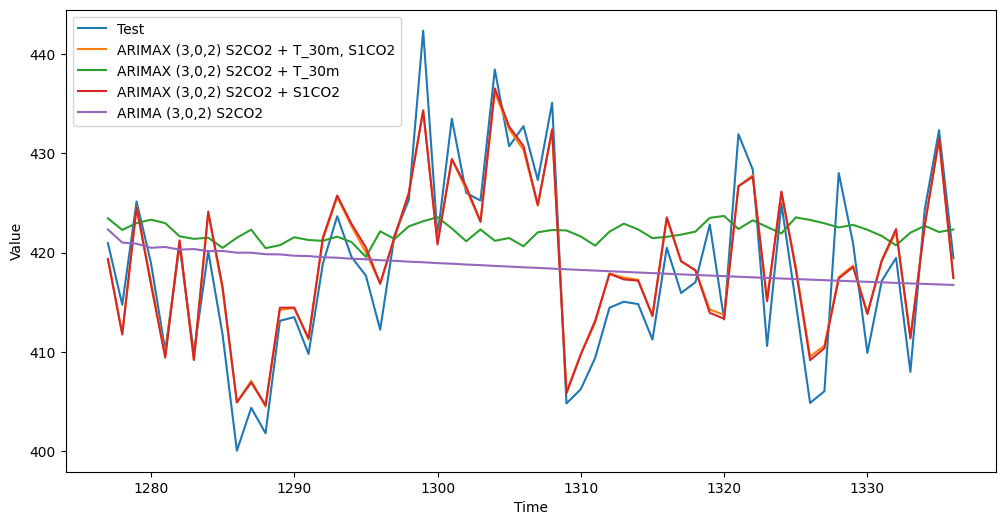

CPU times: user 487 ms, sys: 112 ms, total: 598 ms
Wall time: 486 ms


In [ ]:
%%time
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['S2CO2'], label='Test')
plt.plot(test.index, model1, label='ARIMAX (3,0,2) S2CO2 + T_30m, S1CO2')
plt.plot(test.index, model2, label='ARIMAX (3,0,2) S2CO2 + T_30m')
plt.plot(test.index, model3, label='ARIMAX (3,0,2) S2CO2 + S1CO2')
plt.plot(test.index, model4, label='ARIMA (3,0,2) S2CO2')

plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# T_30m new

## ARIMAX (3,0,2) T_30m + S1CO2, S2CO2 

In [ ]:
%%time
# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMAX
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 0
q = 2
P = 0
D = 0
Q = 0
s = 0

# Добавление экзогенных переменных (предполагается, что они находятся в столбцах 'exog1', 'exog2', ...)
exog_train = train[['S1CO2', 'S2CO2']]
exog_test = test[['S1CO2', 'S2CO2']]

# Построение модели ARIMAX
model = SARIMAX(train['T_30m'], exog=exog_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=True)

# Прогнозирование
forecast = results.get_forecast(steps=60, exog=exog_test)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

CPU times: user 2.17 s, sys: 1.62 s, total: 3.79 s
Wall time: 2.26 s


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


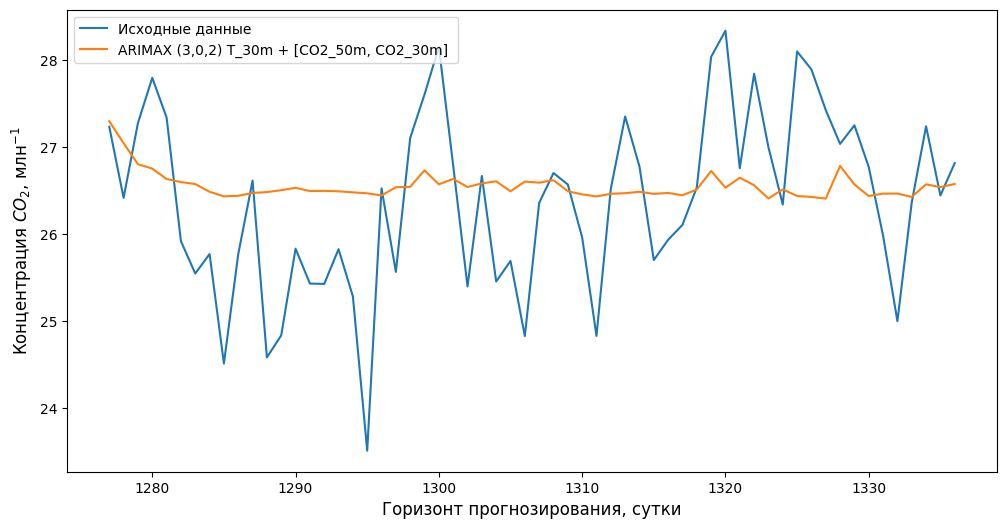

CPU times: user 273 ms, sys: 18.9 ms, total: 292 ms
Wall time: 541 ms


In [ ]:
%%time

# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['T_30m'], label='Train')
plt.plot(test.index, test['T_30m'], label='Исходные данные')
plt.plot(test.index, forecast_values, label='ARIMAX (3,0,2) T_30m + [CO2_50m, CO2_30m] ')
#plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Горизонт прогнозирования, сутки',fontsize=12)
plt.ylabel('Концентрация $CO_{2}$, млн$^{-1}$', fontsize=12)
plt.show()

In [ ]:
%%time

model1 = forecast_values.reset_index()['predicted_mean']

CPU times: user 1.71 ms, sys: 0 ns, total: 1.71 ms
Wall time: 1.71 ms


In [ ]:
model1

0     27.296042
1     27.044083
2     26.802187
3     26.751515
4     26.632481
5     26.597136
6     26.574412
7     26.485213
8     26.433021
9     26.439350
10    26.472069
11    26.482153
12    26.503599
13    26.531314
14    26.493969
15    26.496061
16    26.490863
17    26.479010
18    26.468130
19    26.443026
20    26.537604
21    26.542204
22    26.732095
23    26.571071
24    26.633392
25    26.540303
26    26.582321
27    26.605906
28    26.491337
29    26.602853
30    26.590132
31    26.618975
32    26.492116
33    26.455775
34    26.432032
35    26.462517
36    26.469174
37    26.485593
38    26.461497
39    26.472353
40    26.445293
41    26.511610
42    26.725175
43    26.532755
44    26.647117
45    26.560875
46    26.408459
47    26.512908
48    26.436992
49    26.426293
50    26.406825
51    26.782106
52    26.569608
53    26.436590
54    26.464492
55    26.465210
56    26.426334
57    26.570957
58    26.539243
59    26.575133
Name: predicted_mean, dtype: float64

## ARIMAX (3,0,2) S2CO2 + T_30m

In [ ]:
%%time

# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMAX
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 0
q = 2
P = 0
D = 0
Q = 0
s = 0

# Добавление экзогенных переменных (предполагается, что они находятся в столбцах 'exog1', 'exog2', ...)
exog_train = train[['S2CO2']]
exog_test = test[['S2CO2']]

# Построение модели ARIMAX
model = SARIMAX(train['T_30m'], exog=exog_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=False)
print(results.aic)

# Прогнозирование
forecast = results.get_forecast(steps=60, exog=exog_test)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

3046.4662982278182
CPU times: user 1.82 s, sys: 1.23 s, total: 3.04 s
Wall time: 1.56 s


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


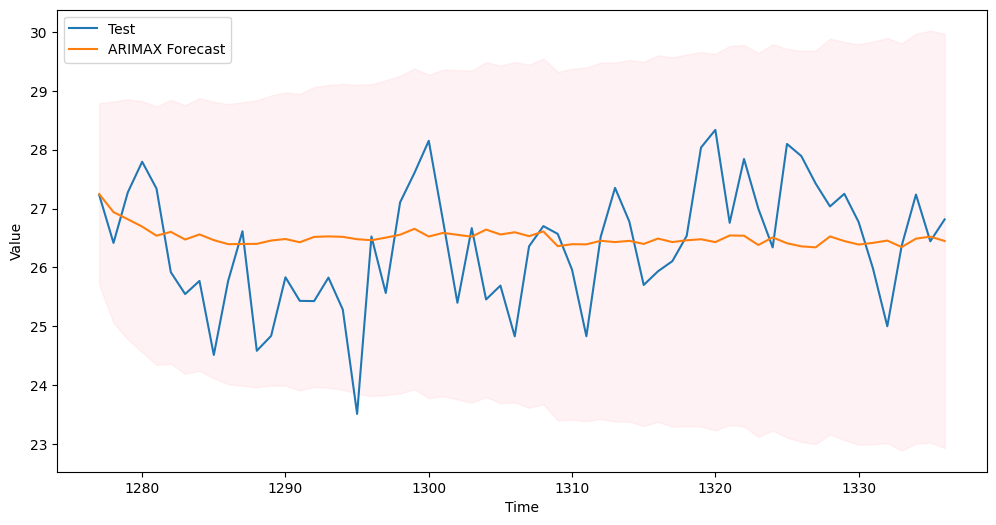

CPU times: user 237 ms, sys: 23.2 ms, total: 260 ms
Wall time: 516 ms


In [ ]:
%%time
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['T_30m'], label='Test')
plt.plot(test.index, forecast_values, label='ARIMAX Forecast')
plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
%%time
model2 = forecast_values.reset_index()['predicted_mean']

CPU times: user 1.13 ms, sys: 77 µs, total: 1.21 ms
Wall time: 1.19 ms


## ARIMAX (3,0,2) S2CO2 + S1CO2

In [ ]:
%%time
# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMAX
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 0
q = 2
P = 0
D = 0
Q = 0
s = 0

# Добавление экзогенных переменных (предполагается, что они находятся в столбцах 'exog1', 'exog2', ...)
exog_train = train[['S1CO2']]
exog_test = test[['S1CO2']]

# Построение модели ARIMAX
model = SARIMAX(train['T_30m'], exog=exog_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=False)

# Прогнозирование
forecast = results.get_forecast(steps=60, exog=exog_test)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


CPU times: user 2.26 s, sys: 1.75 s, total: 4.01 s
Wall time: 4.78 s


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


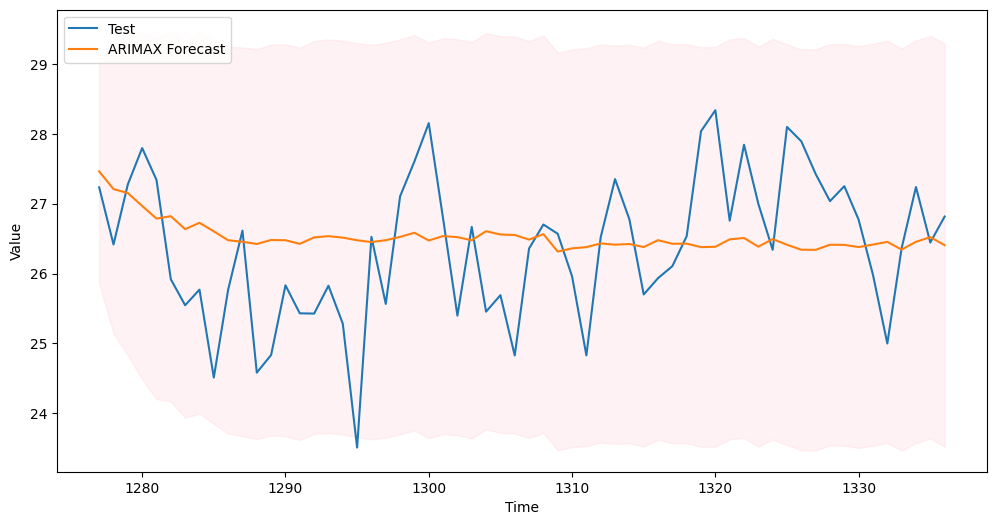

CPU times: user 223 ms, sys: 42.4 ms, total: 265 ms
Wall time: 230 ms


In [ ]:
%%time
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['T_30m'], label='Train')
plt.plot(test.index, test['T_30m'], label='Test')
plt.plot(test.index, forecast_values, label='ARIMAX Forecast')
plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
%%time
test_data = test['T_30m'].reset_index()['T_30m']
model3 = forecast_values.reset_index()['predicted_mean']

CPU times: user 1.98 ms, sys: 0 ns, total: 1.98 ms
Wall time: 2.26 ms


In [ ]:
%%time
g = []
mse1 = []
mse2 = []
mse3 = []
for i in range(len(test_data)):
  g.append(i+1)
  mse1.append(mean_squared_error(test_data[:(i+1)],model1[:(i+1)]))
  mse2.append(mean_squared_error(test_data[:(i+1)],model2[:(i+1)]))
  mse3.append(mean_squared_error(test_data[:(i+1)],model3[:(i+1)]))


CPU times: user 84.4 ms, sys: 0 ns, total: 84.4 ms
Wall time: 88.4 ms


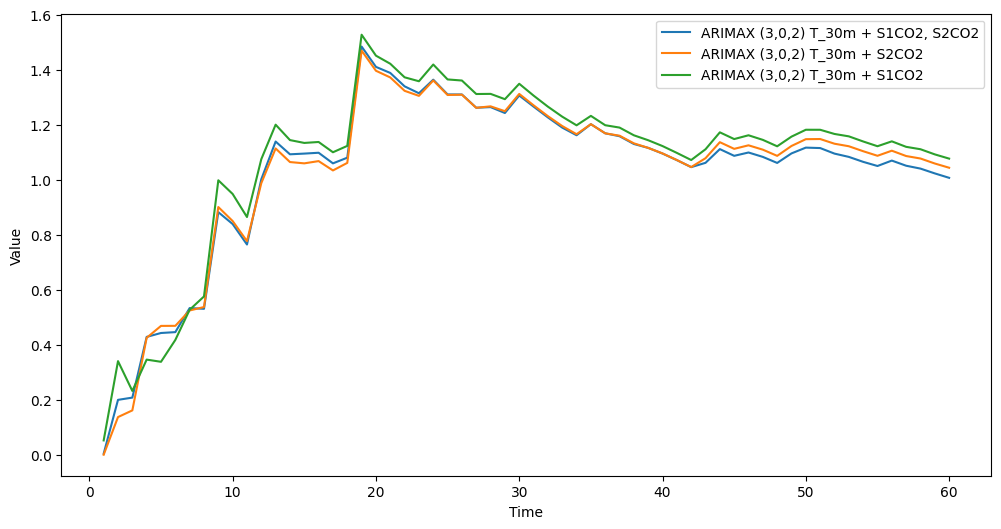

CPU times: user 231 ms, sys: 53.7 ms, total: 285 ms
Wall time: 280 ms


In [ ]:
%%time
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(g, mse1, label='ARIMAX (3,0,2) T_30m + S1CO2, S2CO2')
plt.plot(g, mse2, label='ARIMAX (3,0,2) T_30m + S2CO2')
plt.plot(g, mse3, label='ARIMAX (3,0,2) T_30m + S1CO2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

ARIMA

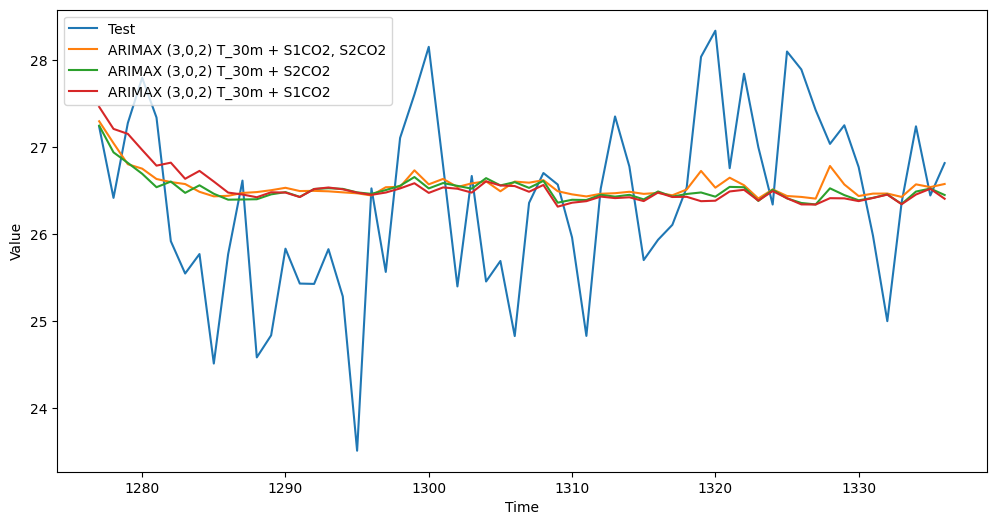

CPU times: user 263 ms, sys: 42.7 ms, total: 305 ms
Wall time: 379 ms


In [ ]:
%%time
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['T_30m'], label='Test')
plt.plot(test.index, model1, label='ARIMAX (3,0,2) T_30m + S1CO2, S2CO2')
plt.plot(test.index, model2, label='ARIMAX (3,0,2) T_30m + S2CO2')
plt.plot(test.index, model3, label='ARIMAX (3,0,2) T_30m + S1CO2')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## ARIMA (3,0,2) 

In [ ]:
%%time
from statsmodels.tsa.arima.model import ARIMA

CPU times: user 10.2 ms, sys: 361 µs, total: 10.5 ms
Wall time: 22.8 ms


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


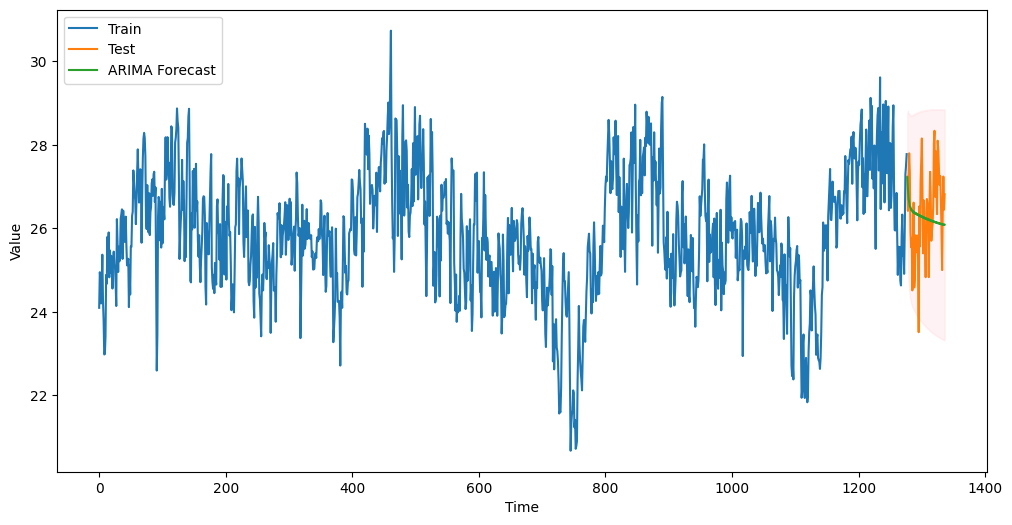

CPU times: user 1.94 s, sys: 1.32 s, total: 3.25 s
Wall time: 1.71 s


In [ ]:
%%time
# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMA
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 0
q = 2

# Построение модели ARIMA
model = ARIMA(train['T_30m'], order=(p, d, q))
results = model.fit()

# Прогнозирование
forecast = results.get_forecast(steps=60)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['T_30m'], label='Train')
plt.plot(test.index, test['T_30m'], label='Test')
plt.plot(test.index, forecast_values, label='ARIMA Forecast')
plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [ ]:
%%time
model4 = forecast_values.reset_index()['predicted_mean']

CPU times: user 1.09 ms, sys: 51 µs, total: 1.14 ms
Wall time: 1.1 ms


In [ ]:
%%time
g = []
mse1 = []
mse2 = []
mse3 = []
mse4 = []

for i in range(len(test_data)):
  g.append(i+1)
  mse1.append(mean_squared_error(test_data[:(i+1)],model1[:(i+1)]))
  mse2.append(mean_squared_error(test_data[:(i+1)],model2[:(i+1)]))
  mse3.append(mean_squared_error(test_data[:(i+1)],model3[:(i+1)]))
  mse4.append(mean_squared_error(test_data[:(i+1)],model4[:(i+1)]))

mse_table = pd.DataFrame({
    'g': g,
    'mse1': mse1,
    'mse2': mse2,
    'mse3': mse3,
    'mse4': mse4
})

data_table = pd.DataFrame({
    'time': g,
    'real data': test_data[:(i+1)],
    'ARIMAX (3,0,2) S2CO2 + T_30m, S1CO2': model1[:(i+1)],
    'ARIMAX (3,0,2) S2CO2 + T_30m': model2[:(i+1)],
    'ARIMAX (3,0,2) S2CO2 + S1CO2': model3[:(i+1)],
    'ARIMA (3,0,2) S2CO2': model4[:(i+1)]
})

mse_table.to_excel(f'/content/drive/MyDrive/Prediction models/new ARIMAX/mse T_30m errors all.xlsx')

data_table.to_excel(f'/content/drive/MyDrive/Prediction models/new ARIMAX/real T_30m data all.xlsx')

CPU times: user 114 ms, sys: 524 µs, total: 115 ms
Wall time: 130 ms


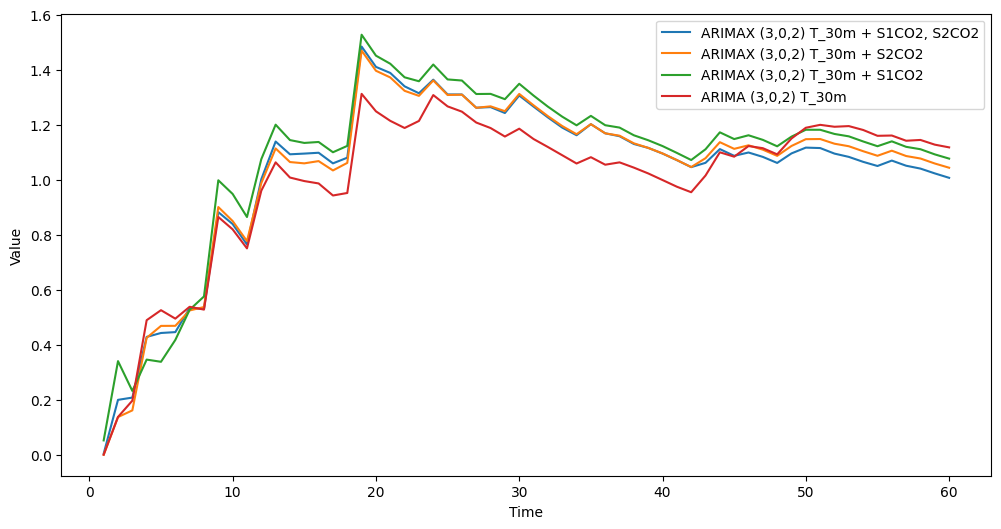

CPU times: user 326 ms, sys: 43.9 ms, total: 370 ms
Wall time: 495 ms


In [ ]:
%%time
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(g, mse1, label='ARIMAX (3,0,2) T_30m + S1CO2, S2CO2')
plt.plot(g, mse2, label='ARIMAX (3,0,2) T_30m + S2CO2')
plt.plot(g, mse3, label='ARIMAX (3,0,2) T_30m + S1CO2')
plt.plot(g, mse4, label='ARIMA (3,0,2) T_30m')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

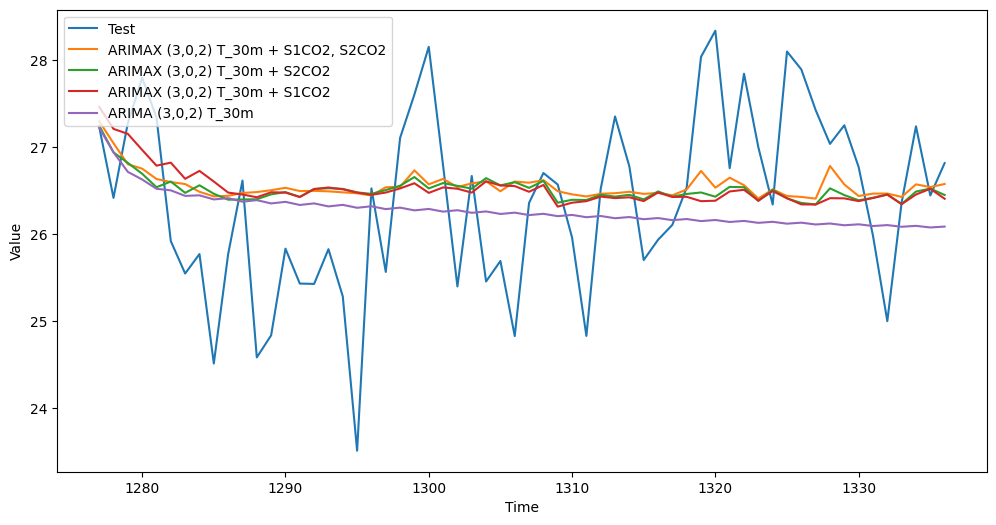

CPU times: user 296 ms, sys: 48.1 ms, total: 344 ms
Wall time: 382 ms


In [ ]:
%%time
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['T_30m'], label='Test')
plt.plot(test.index, model1, label='ARIMAX (3,0,2) T_30m + S1CO2, S2CO2')
plt.plot(test.index, model2, label='ARIMAX (3,0,2) T_30m + S2CO2')
plt.plot(test.index, model3, label='ARIMAX (3,0,2) T_30m + S1CO2')
plt.plot(test.index, model4, label='ARIMA (3,0,2) T_30m')

plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# S1CO2

## ARIMAX (3,0,2) S1CO2 + T_30m, S2CO2 

In [ ]:
# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMAX
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 0
q = 2
P = 0
D = 0
Q = 0
s = 0

# Добавление экзогенных переменных (предполагается, что они находятся в столбцах 'exog1', 'exog2', ...)
exog_train = train[['T_30m', 'S2CO2']]
exog_test = test[['T_30m', 'S2CO2']]

# Построение модели ARIMAX
model = SARIMAX(train['S1CO2'], exog=exog_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=False)

# Прогнозирование
forecast = results.get_forecast(steps=60, exog=exog_test)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

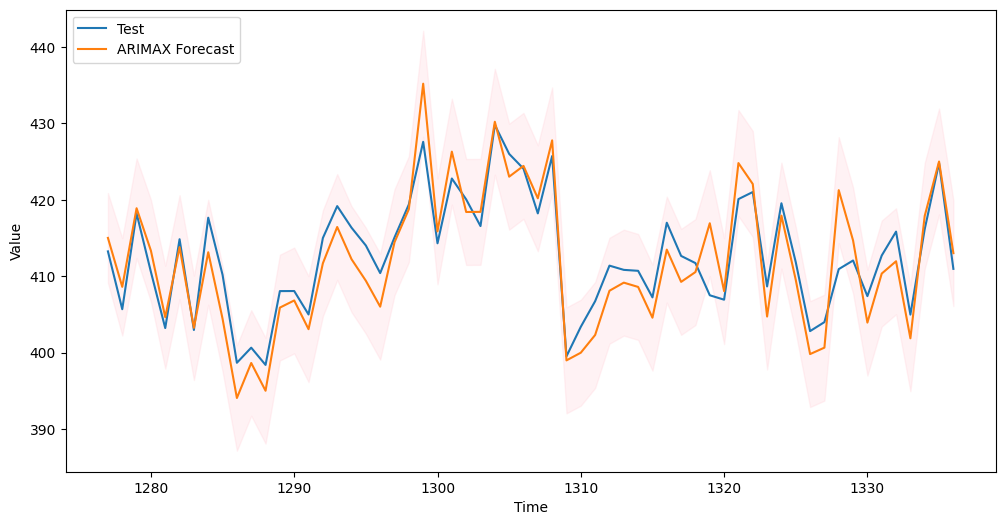

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['S1CO2'], label='Test')
plt.plot(test.index, forecast_values, label='ARIMAX Forecast')
plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
model1 = forecast_values.reset_index()['predicted_mean']

## ARIMAX (3,0,2) S1CO2 + T_30m

In [ ]:
# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMAX
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 0
q = 2
P = 0
D = 0
Q = 0
s = 0

# Добавление экзогенных переменных (предполагается, что они находятся в столбцах 'exog1', 'exog2', ...)
exog_train = train[['T_30m']]
exog_test = test[['T_30m']]

# Построение модели ARIMAX
model = SARIMAX(train['S1CO2'], exog=exog_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=False)

# Прогнозирование
forecast = results.get_forecast(steps=60, exog=exog_test)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


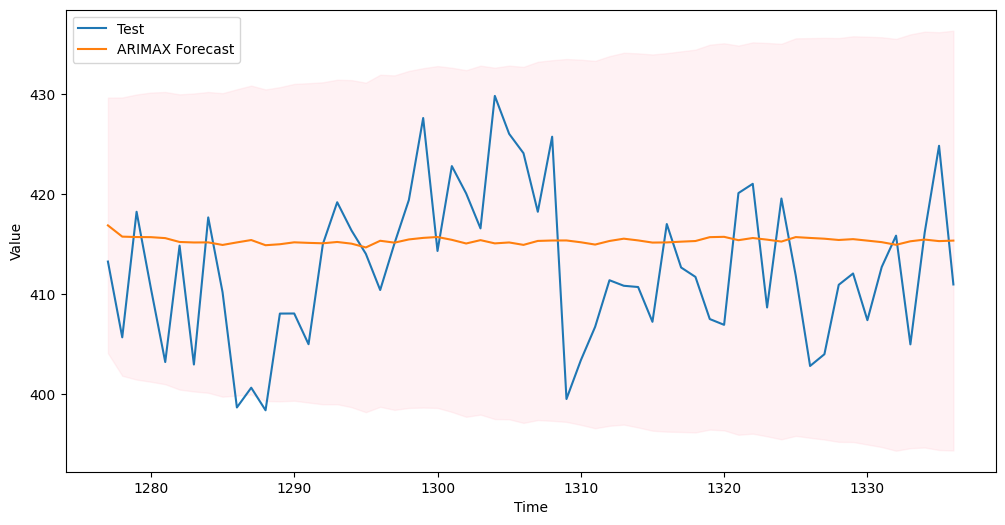

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['S1CO2'], label='Test')
plt.plot(test.index, forecast_values, label='ARIMAX Forecast')
plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
model2 = forecast_values.reset_index()['predicted_mean']

## ARIMAX (3,0,2) S1CO2 + S2CO2

In [ ]:
# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMAX
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 0
q = 2
P = 0
D = 0
Q = 0
s = 0

# Добавление экзогенных переменных (предполагается, что они находятся в столбцах 'exog1', 'exog2', ...)
exog_train = train[['S2CO2']]
exog_test = test[['S2CO2']]

# Построение модели ARIMAX
model = SARIMAX(train['S1CO2'], exog=exog_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=False)

# Прогнозирование
forecast = results.get_forecast(steps=60, exog=exog_test)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

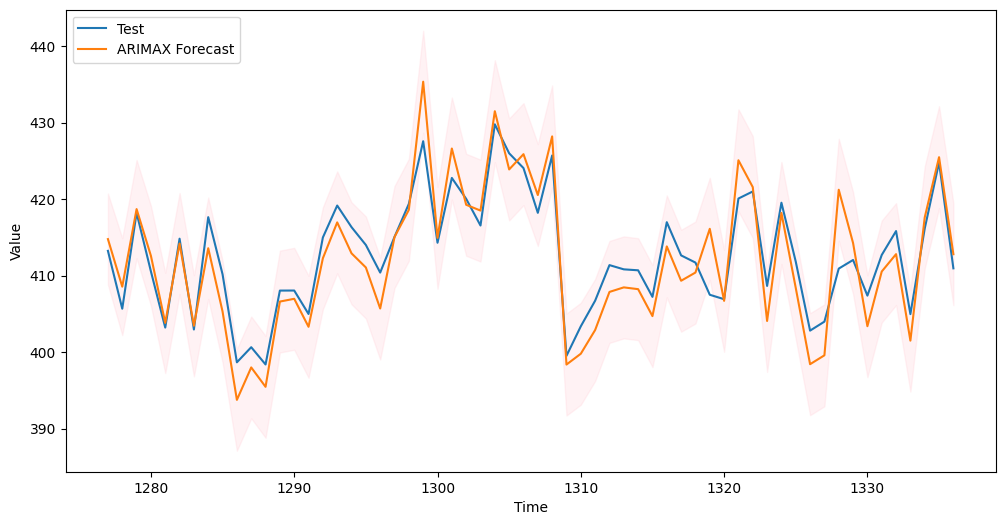

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['S1CO2'], label='Test')
plt.plot(test.index, forecast_values, label='ARIMAX Forecast')
plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
test_data = test['S1CO2'].reset_index()['S1CO2']
model3 = forecast_values.reset_index()['predicted_mean']

In [ ]:
g = []
mse1 = []
mse2 = []
mse3 = []
for i in range(len(test_data)):
  g.append(i+1)
  mse1.append(mean_squared_error(test_data[:(i+1)],model1[:(i+1)]))
  mse2.append(mean_squared_error(test_data[:(i+1)],model2[:(i+1)]))
  mse3.append(mean_squared_error(test_data[:(i+1)],model3[:(i+1)]))


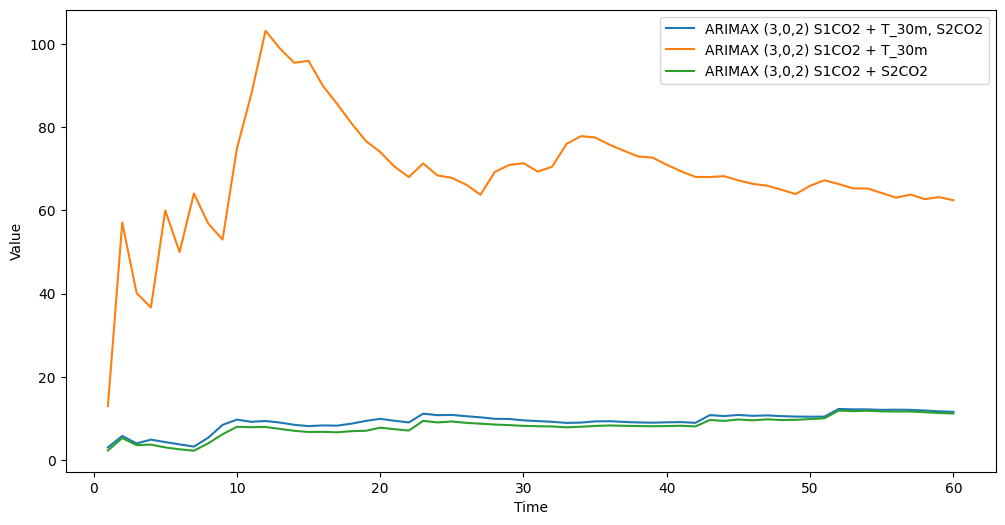

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(g, mse1, label='ARIMAX (3,0,2) S1CO2 + T_30m, S2CO2')
plt.plot(g, mse2, label='ARIMAX (3,0,2) S1CO2 + T_30m')
plt.plot(g, mse3, label='ARIMAX (3,0,2) S1CO2 + S2CO2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

ARIMA

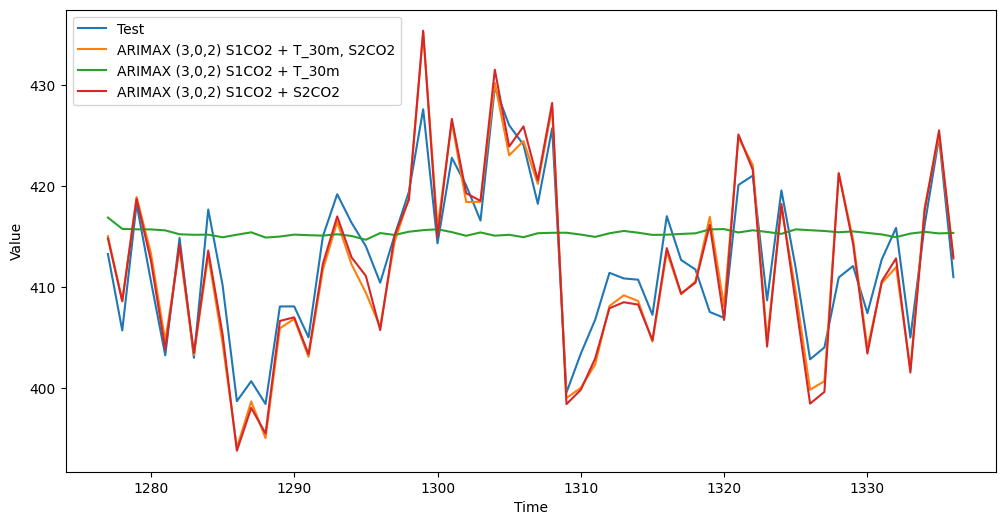

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['S1CO2'], label='Test')
plt.plot(test.index, model1, label='ARIMAX (3,0,2) S1CO2 + T_30m, S2CO2')
plt.plot(test.index, model2, label='ARIMAX (3,0,2) S1CO2 + T_30m')
plt.plot(test.index, model3, label='ARIMAX (3,0,2) S1CO2 + S2CO2')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## ARIMA (3,0,2) 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


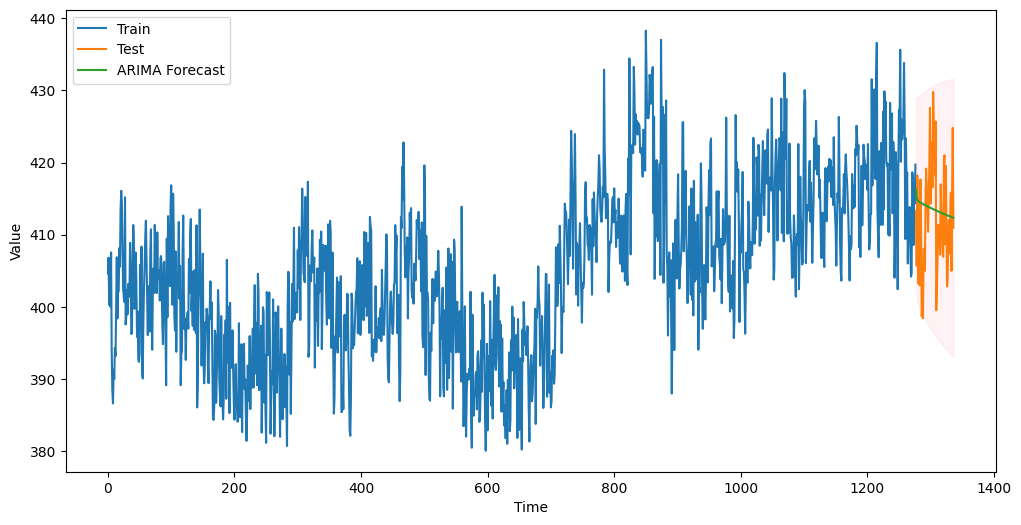

In [ ]:
# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMA
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 0
q = 2

# Построение модели ARIMA
model = ARIMA(train['S1CO2'], order=(p, d, q))
results = model.fit()

# Прогнозирование
forecast = results.get_forecast(steps=60)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['S1CO2'], label='Train')
plt.plot(test.index, test['S1CO2'], label='Test')
plt.plot(test.index, forecast_values, label='ARIMA Forecast')
plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [ ]:
model4 = forecast_values.reset_index()['predicted_mean']

In [ ]:
g = []
mse1 = []
mse2 = []
mse3 = []
mse4 = []

for i in range(len(test_data)):
  g.append(i+1)
  mse1.append(mean_squared_error(test_data[:(i+1)],model1[:(i+1)]))
  mse2.append(mean_squared_error(test_data[:(i+1)],model2[:(i+1)]))
  mse3.append(mean_squared_error(test_data[:(i+1)],model3[:(i+1)]))
  mse4.append(mean_squared_error(test_data[:(i+1)],model4[:(i+1)]))


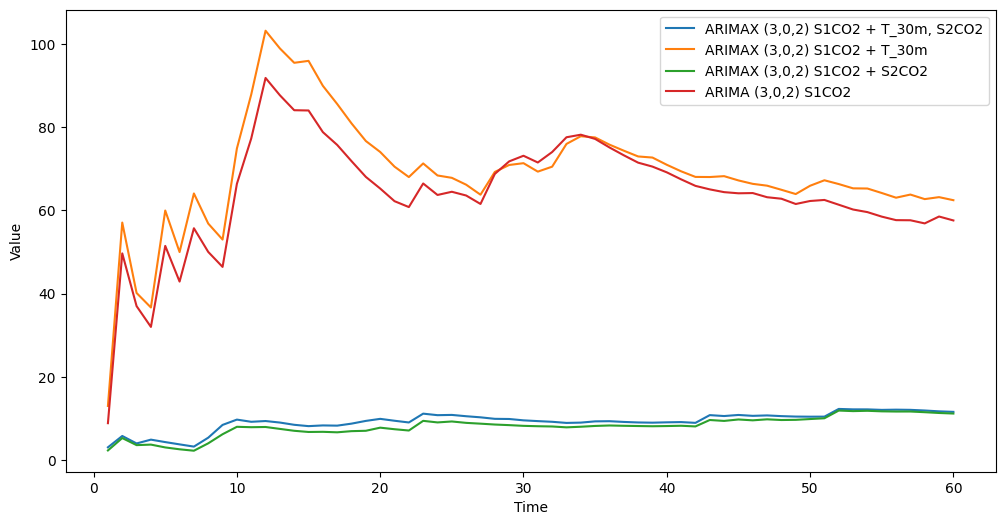

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(g, mse1, label='ARIMAX (3,0,2) S1CO2 + T_30m, S2CO2')
plt.plot(g, mse2, label='ARIMAX (3,0,2) S1CO2 + T_30m')
plt.plot(g, mse3, label='ARIMAX (3,0,2) S1CO2 + S2CO2')
plt.plot(g, mse4, label='ARIMA (3,0,2) S1CO2')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

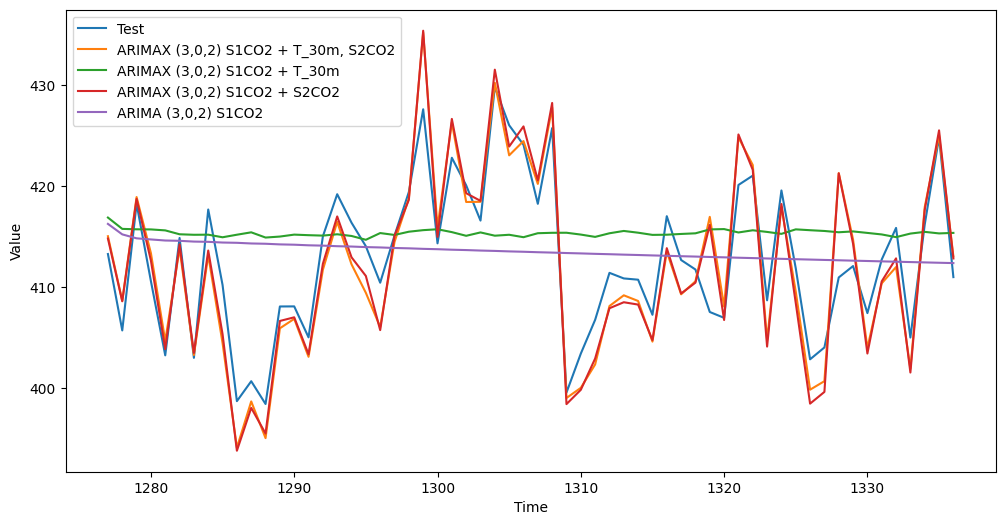

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['S1CO2'], label='Test')
plt.plot(test.index, model1, label='ARIMAX (3,0,2) S1CO2 + T_30m, S2CO2')
plt.plot(test.index, model2, label='ARIMAX (3,0,2) S1CO2 + T_30m')
plt.plot(test.index, model3, label='ARIMAX (3,0,2) S1CO2 + S2CO2')
plt.plot(test.index, model4, label='ARIMA (3,0,2) S1CO2')

plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# T_30m

## ARIMAX (3,0,2) T_30m + S1CO2, S2CO2 

In [ ]:
# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMAX
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 0
q = 2
P = 0
D = 0
Q = 0
s = 0

# Добавление экзогенных переменных (предполагается, что они находятся в столбцах 'exog1', 'exog2', ...)
exog_train = train[['S1CO2', 'S2CO2']]
exog_test = test[['S1CO2', 'S2CO2']]

# Построение модели ARIMAX
model = SARIMAX(train['T_30m'], exog=exog_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=False)

# Прогнозирование
forecast = results.get_forecast(steps=60, exog=exog_test)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


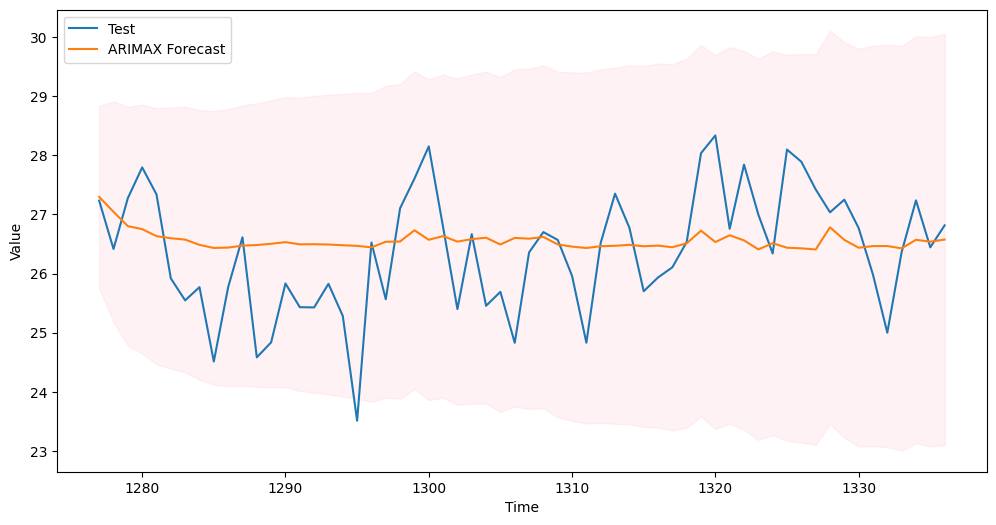

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['T_30m'], label='Test')
plt.plot(test.index, forecast_values, label='ARIMAX Forecast')
plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
model1 = forecast_values.reset_index()['predicted_mean']

## ARIMAX (3,0,2) T_30m + S1CO2

In [ ]:
# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMAX
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 0
q = 2
P = 0
D = 0
Q = 0
s = 0

# Добавление экзогенных переменных (предполагается, что они находятся в столбцах 'exog1', 'exog2', ...)
exog_train = train[['S1CO2']]
exog_test = test[['S1CO2']]

# Построение модели ARIMAX
model = SARIMAX(train['T_30m'], exog=exog_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=False)

# Прогнозирование
forecast = results.get_forecast(steps=60, exog=exog_test)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


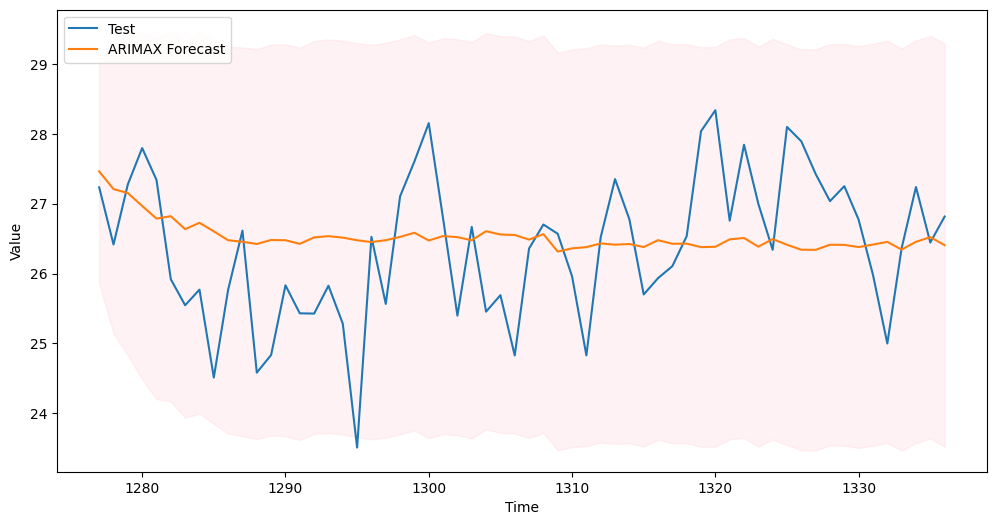

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['T_30m'], label='Test')
plt.plot(test.index, forecast_values, label='ARIMAX Forecast')
plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
model2 = forecast_values.reset_index()['predicted_mean']

## ARIMAX (3,0,2) T_30m + S2CO2

In [ ]:
# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMAX
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 0
q = 2
P = 0
D = 0
Q = 0
s = 0

# Добавление экзогенных переменных (предполагается, что они находятся в столбцах 'exog1', 'exog2', ...)
exog_train = train[['S2CO2']]
exog_test = test[['S2CO2']]

# Построение модели ARIMAX
model = SARIMAX(train['T_30m'], exog=exog_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=False)

# Прогнозирование
forecast = results.get_forecast(steps=60, exog=exog_test)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


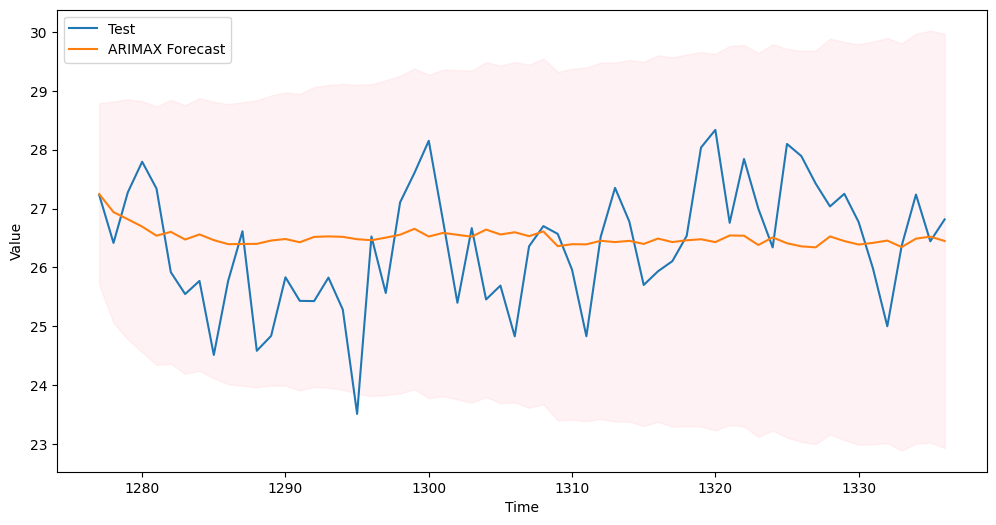

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['T_30m'], label='Test')
plt.plot(test.index, forecast_values, label='ARIMAX Forecast')
plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
test_data = test['T_30m'].reset_index()['T_30m']
model3 = forecast_values.reset_index()['predicted_mean']

In [ ]:
g = []
mse1 = []
mse2 = []
mse3 = []
for i in range(len(test_data)):
  g.append(i+1)
  mse1.append(mean_squared_error(test_data[:(i+1)],model1[:(i+1)]))
  mse2.append(mean_squared_error(test_data[:(i+1)],model2[:(i+1)]))
  mse3.append(mean_squared_error(test_data[:(i+1)],model3[:(i+1)]))


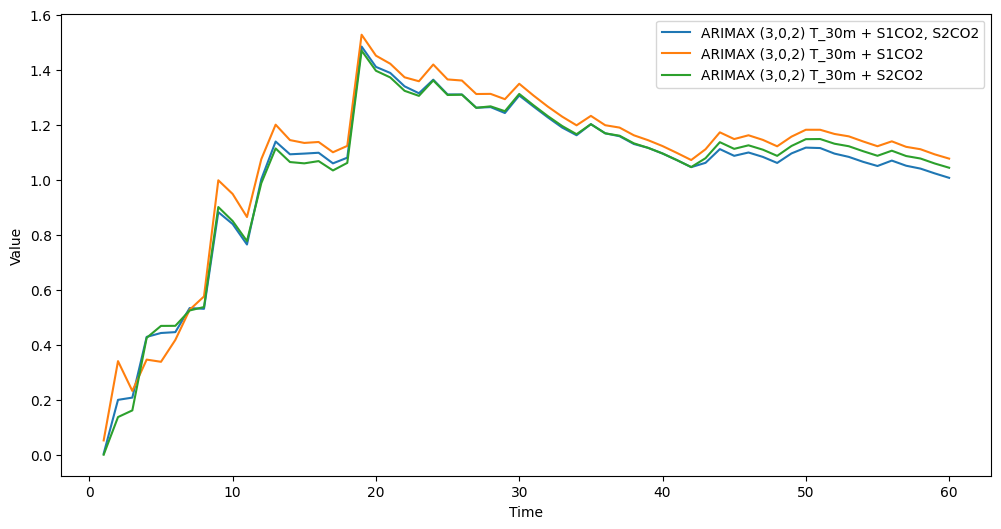

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(g, mse1, label='ARIMAX (3,0,2) T_30m + S1CO2, S2CO2')
plt.plot(g, mse2, label='ARIMAX (3,0,2) T_30m + S1CO2')
plt.plot(g, mse3, label='ARIMAX (3,0,2) T_30m + S2CO2')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

ARIMA

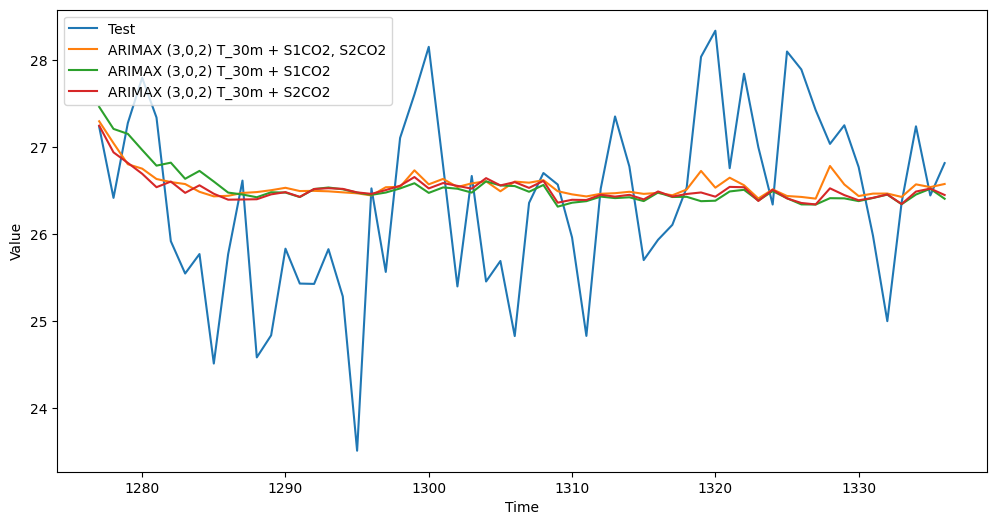

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['T_30m'], label='Test')
plt.plot(test.index, model1, label='ARIMAX (3,0,2) T_30m + S1CO2, S2CO2')
plt.plot(test.index, model2, label='ARIMAX (3,0,2) T_30m + S1CO2')
plt.plot(test.index, model3, label='ARIMAX (3,0,2) T_30m + S2CO2')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## ARIMA (3,0,2) 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


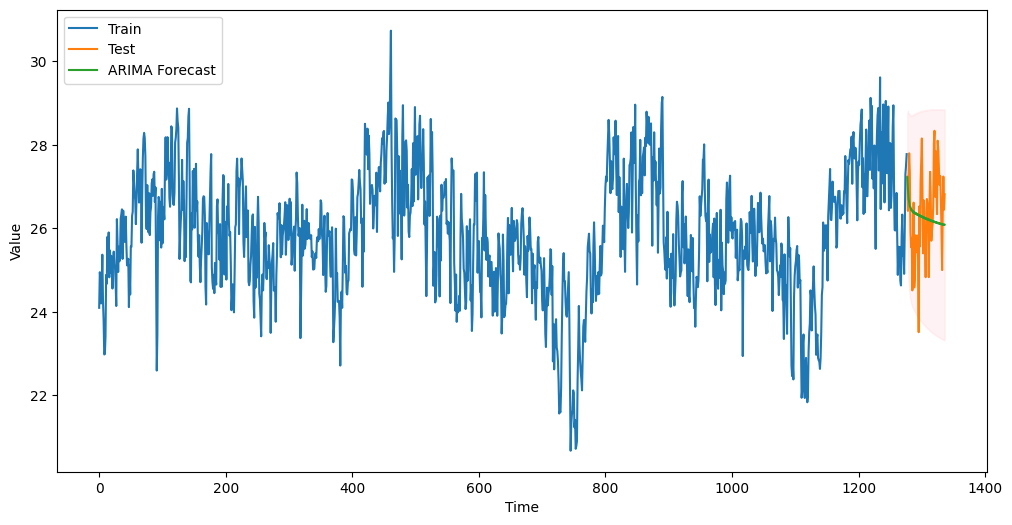

In [ ]:
# Разделение на обучающую и тестовую выборки
train = data.iloc[:-60]
test = data.iloc[-60:]

# Определение оптимальных параметров для модели ARIMA
# Здесь предполагается, что вы уже проанализировали ACF, PACF и провели дифференцирование, если это необходимо
p = 3
d = 0
q = 2

# Построение модели ARIMA
model = ARIMA(train['T_30m'], order=(p, d, q))
results = model.fit()

# Прогнозирование
forecast = results.get_forecast(steps=60)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int(alpha=0.05)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['T_30m'], label='Train')
plt.plot(test.index, test['T_30m'], label='Test')
plt.plot(test.index, forecast_values, label='ARIMA Forecast')
plt.fill_between(test.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [ ]:
model4 = forecast_values.reset_index()['predicted_mean']

In [ ]:
g = []
mse1 = []
mse2 = []
mse3 = []
mse4 = []

for i in range(len(test_data)):
  g.append(i+1)
  mse1.append(mean_squared_error(test_data[:(i+1)],model1[:(i+1)]))
  mse2.append(mean_squared_error(test_data[:(i+1)],model2[:(i+1)]))
  mse3.append(mean_squared_error(test_data[:(i+1)],model3[:(i+1)]))
  mse4.append(mean_squared_error(test_data[:(i+1)],model4[:(i+1)]))


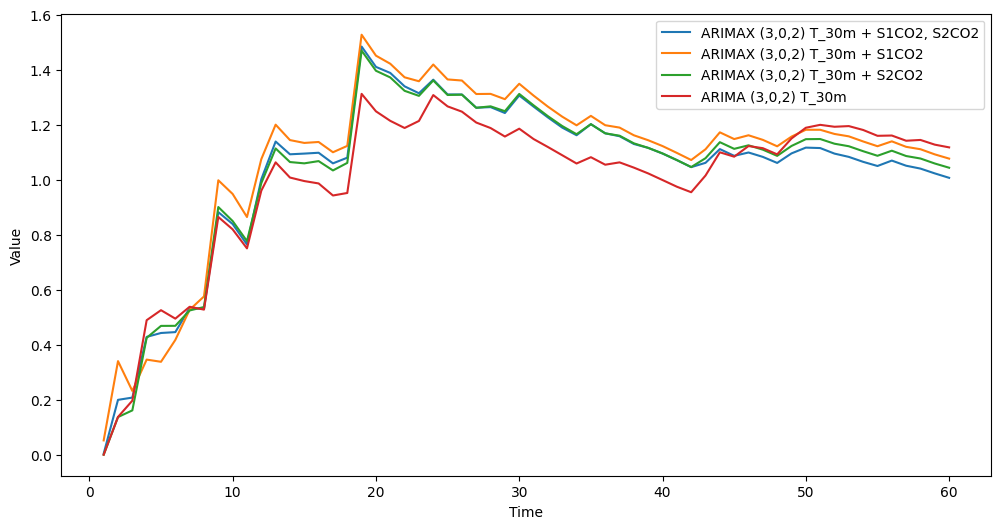

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(g, mse1, label='ARIMAX (3,0,2) T_30m + S1CO2, S2CO2')
plt.plot(g, mse2, label='ARIMAX (3,0,2) T_30m + S1CO2')
plt.plot(g, mse3, label='ARIMAX (3,0,2) T_30m + S2CO2')
plt.plot(g, mse4, label='ARIMA (3,0,2) T_30m')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

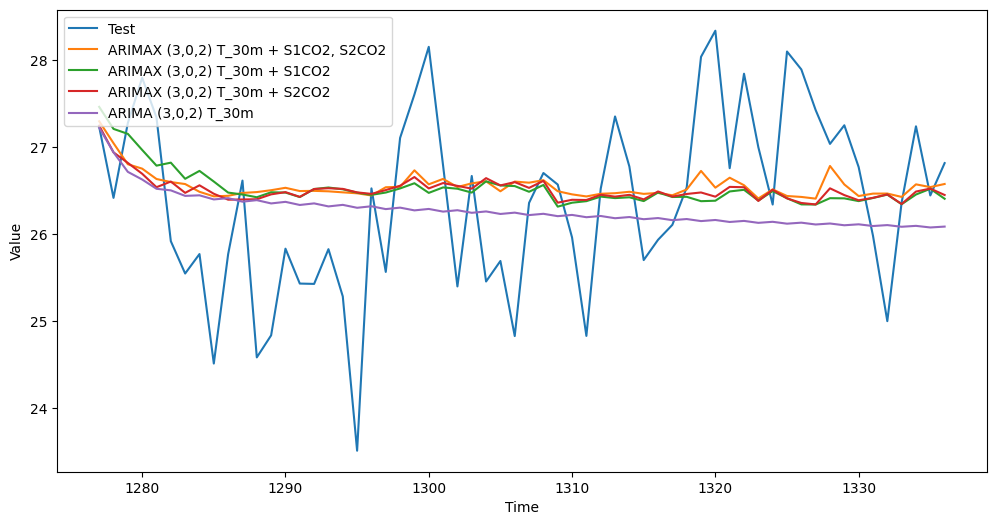

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 6))
#plt.plot(train.index, train['S2CO2'], label='Train')
plt.plot(test.index, test['T_30m'], label='Test')
plt.plot(test.index, model1, label='ARIMAX (3,0,2) T_30m + S1CO2, S2CO2')
plt.plot(test.index, model2, label='ARIMAX (3,0,2) T_30m + S1CO2')
plt.plot(test.index, model3, label='ARIMAX (3,0,2) T_30m + S2CO2')
plt.plot(test.index, model4, label='ARIMA (3,0,2) T_30m')

plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()